<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8B%A4%EB%B3%80%EB%9F%89%EB%B6%84%EC%84%9D_1%EC%9E%A5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#기술통계량 & 분할표

In [105]:
url.survey = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/survey.txt"
survey.data = read.table(url.survey, header=T)

In [106]:
head(survey.data)
attach(survey.data)

,seq,sex,marriage,age,job,edu,salary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,21,1,4,60
2,2,1,1,22,5,5,100
3,3,1,1,33,1,4,200
4,4,2,2,33,7,4,120
5,5,1,2,28,1,4,70
6,6,1,1,21,5,5,80


The following objects are masked from survey.data (pos = 14):

    age, edu, job, marriage, salary, seq, sex




In [107]:
#평균
mean(age)
#표준편차
sd(age)

[1] 34.275

[1] 11.60236

In [108]:
#5분위수(최소, 제1사분위, 중앙값, 제3사분위, 평균)
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   24.75   32.00   34.27   42.50   59.00 

#그룹별 기술통계량

In [12]:
#그룹별 기술통계량
tapply(age, sex, mean)

1        2 
33.96296 34.92308

In [13]:
tapply(age, sex, sd)

1        2 
11.96945 11.24323

In [14]:
tapply(age, marriage, mean)

1        2        3 
24.66667 39.13043 50.50000

In [16]:
sex.marriage = list(sex, marriage)
table(sex.marriage)

              sex.marriage.2
sex.marriage.1  1  2  3
             1 10 15  2
             2  5  8  0

In [17]:
tapply(age, sex.marriage, mean)

,1,2,3
1,24.8,37.86667,50.5
2,24.4,41.50000,NA


In [18]:
tapply(age, sex.marriage, sd)

,1,2,3
1,4.709329,11.230486,12.02082
2,3.209361,9.071147,NA


#빈도표 및 분할표

In [19]:
table(sex)

sex
 1  2 
27 13 

In [20]:
table(edu)

edu
 1  2  3  4  5 
 1  1  3 19 16 

In [22]:
SexEdu = table(sex, edu)
SexEdu

   edu
sex  1  2  3  4  5
  1  1  1  1 13 11
  2  0  0  2  6  5

In [23]:
#성별과 교육 분할표의 독립성 검정결과
summary(SexEdu)
#x2 = 2.58, 유의확률p값 = 0.63으로 0.05보다 크므로 독립이라는 귀무가설 채택

Number of cases in table: 40 
Number of factors: 2 
Test for independence of all factors:
	Chisq = 2.5781, df = 4, p-value = 0.6307
	Chi-squared approximation may be incorrect

#데이터 시각화

##막대그램 & 원그림

In [26]:
edu.tb = table(edu)
rownames(edu.tb) = c("무학", "초졸", "중졸", "고졸", "대졸")
edu.tb

colnames(SexEdu) = c("무학", "초졸", "중졸", "고졸", "대졸")
rownames(SexEdu) = c("남성", "여성")

edu
무학 초졸 중졸 고졸 대졸 
   1    1    3   19   16 

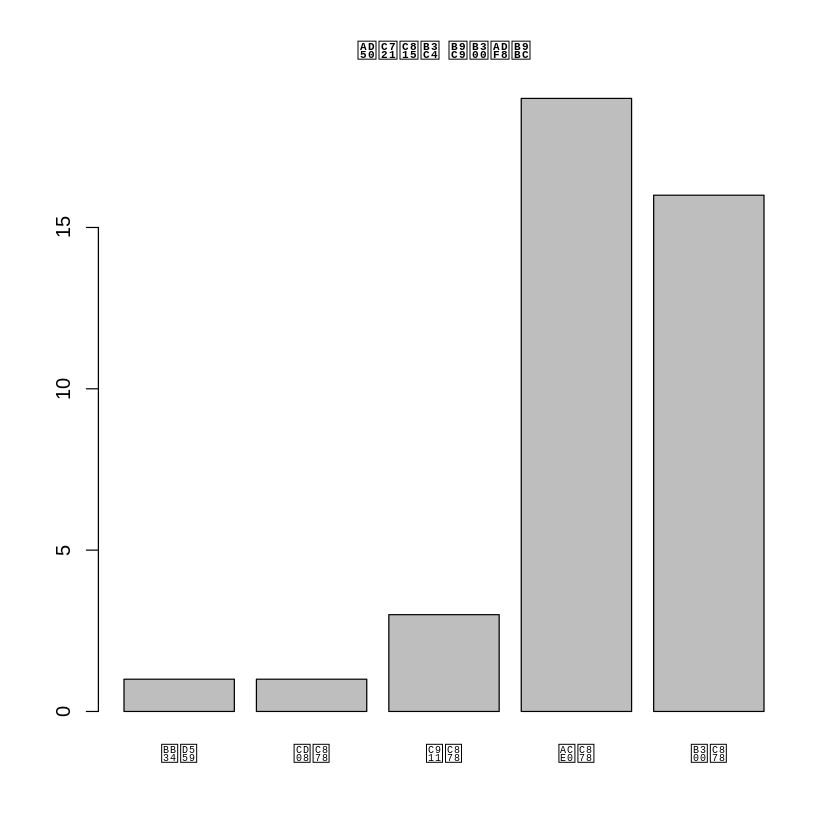

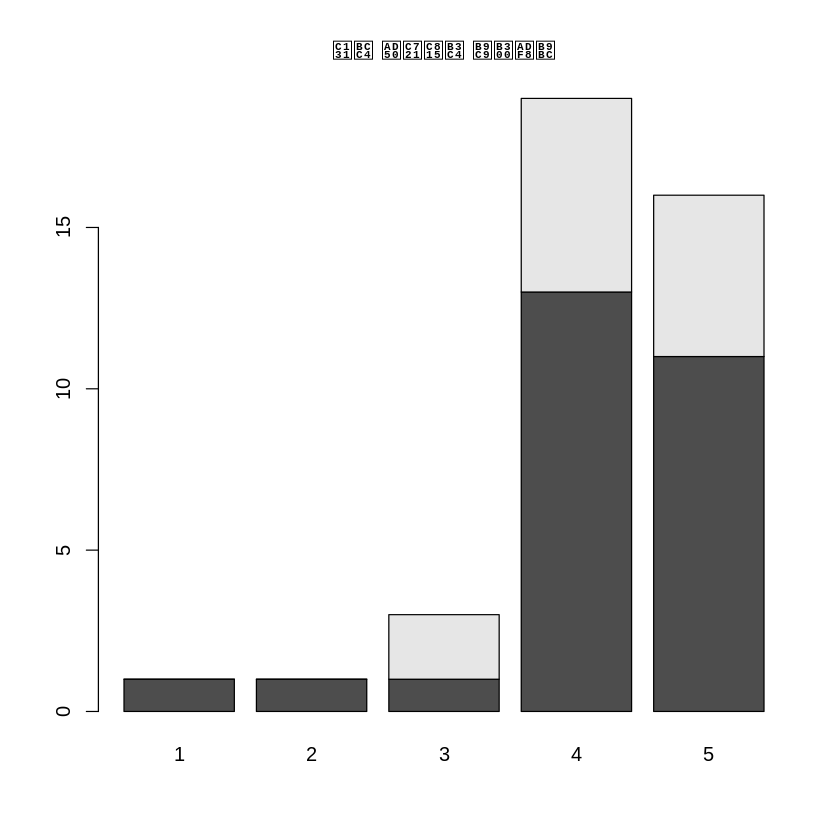

In [36]:
#막대그래프
barplot(edu.tb)
title("교육정도 막대그림")
barplot(SexEdu)
title("성별 교육정도 막대그림")

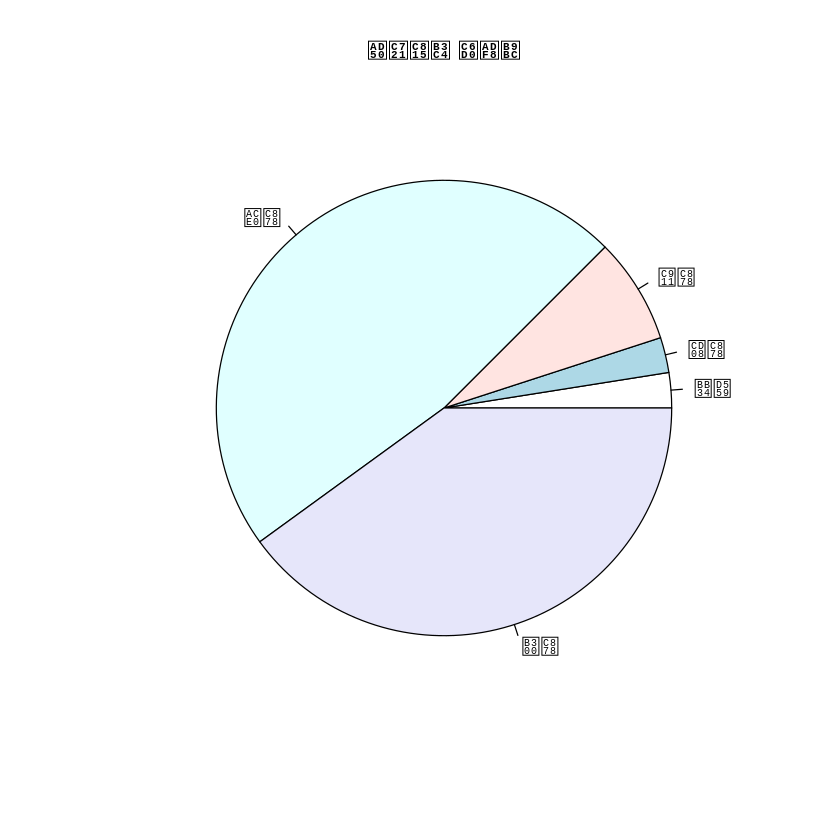

In [28]:
#원그림
pie(edu.tb)
title("교육정도 원그림")

##히스토그램, 줄기잎그림, 상자그림

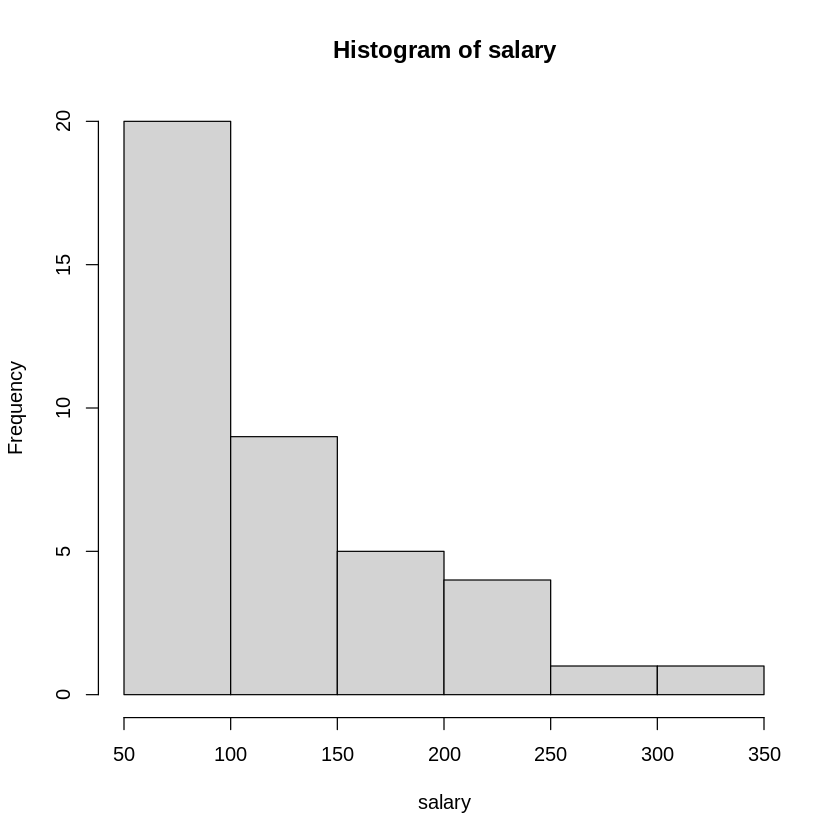

In [37]:
#히스토그램
hist(salary)

In [38]:
#줄기잎그림
stem(salary)


  The decimal point is 2 digit(s) to the right of the |

  0 | 555666677788889
  1 | 00000122233
  1 | 55579
  2 | 000123
  2 | 5
  3 | 0
  3 | 5



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   50.0    77.5   105.0   130.2   175.0   349.0 

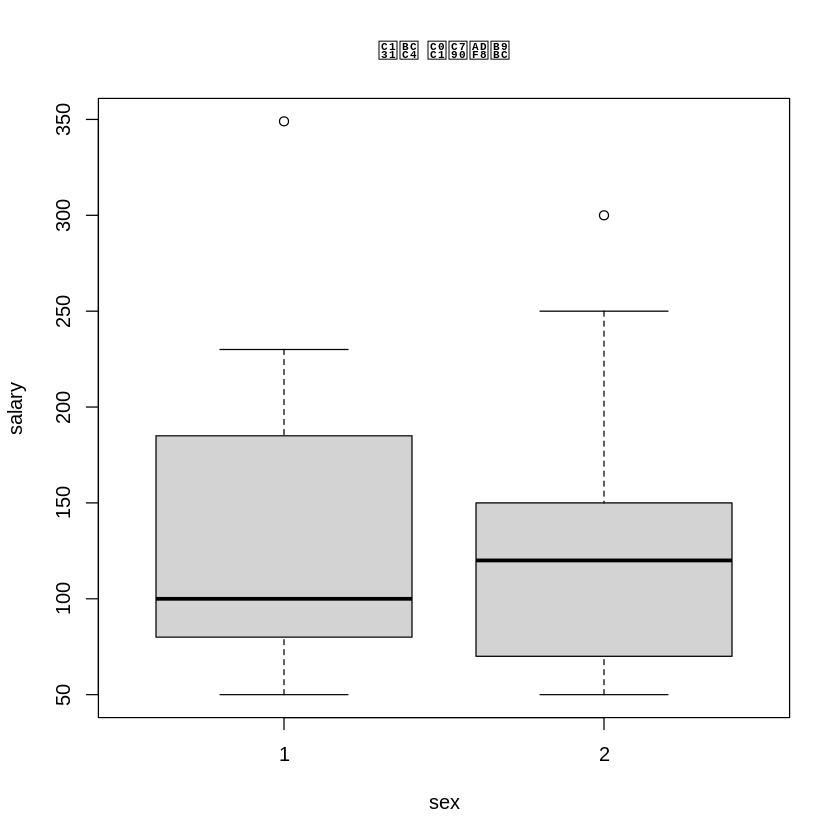

In [40]:
#상자그림
boxplot(salary~sex)
title("성별 상자그림")
summary(salary)

#이변량 그래프

##plot : 그래프
https://www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/plot

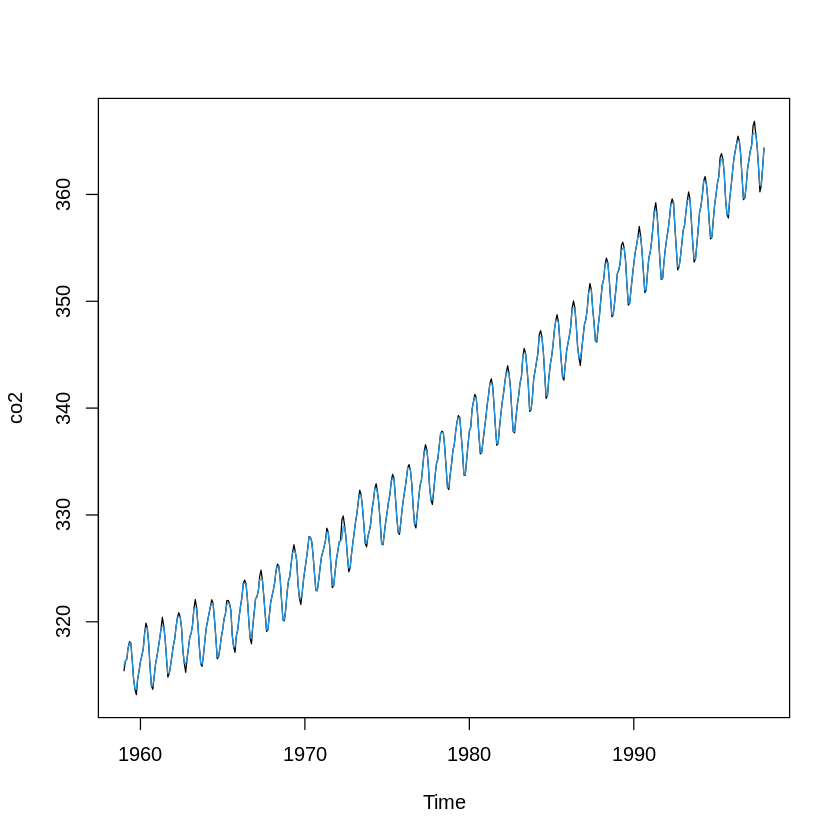

In [41]:
# lines : 데이터를 선으로 연결
plot(co2)
lines(smooth(co2), col=4)

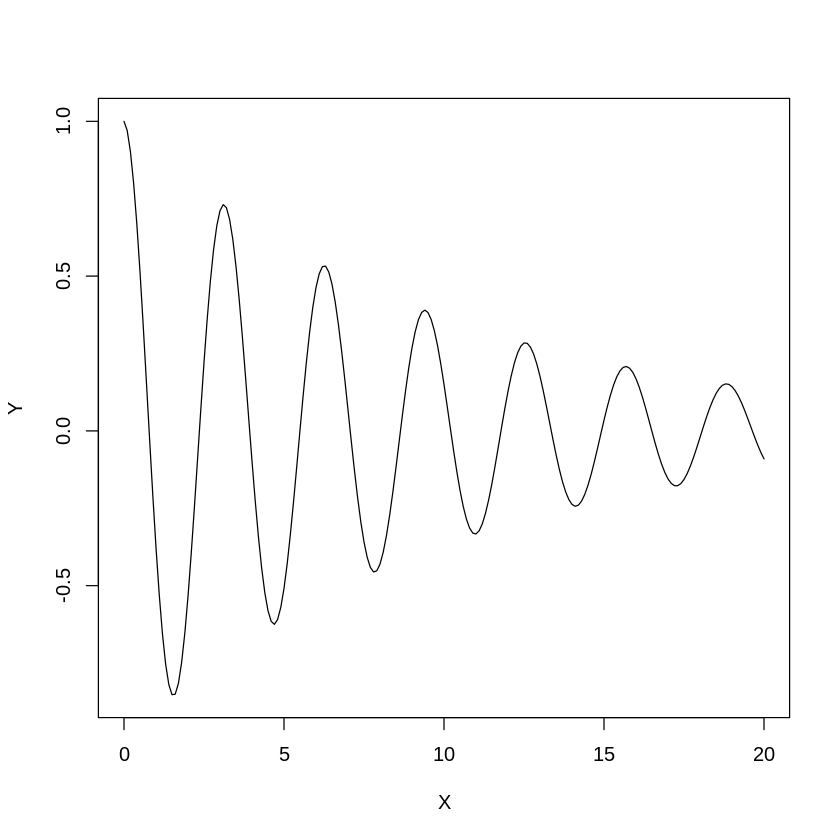

In [55]:
X <- seq(0, 20, 0.1)
Y <- exp(-x/10)*cos(2*x)
plot(X, Y, type="l")

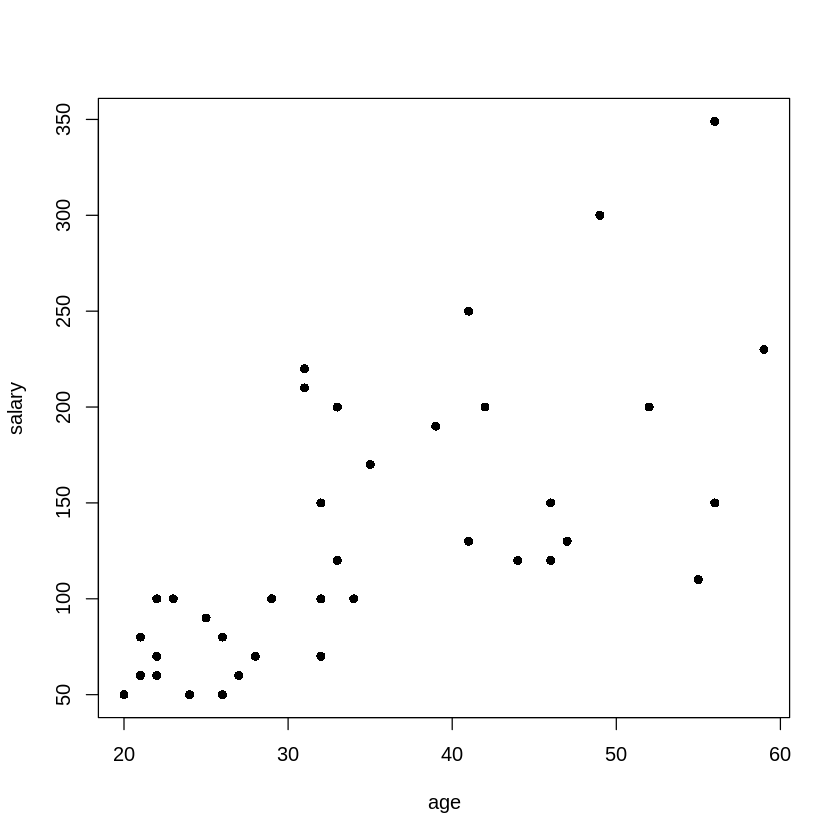

In [64]:
#산점도
plot(salary~ age, pch = 16)

##다른 변수의 정보를 포함한 plot

bivariate boxplot, bubble plot

##bivariate boxplot

In [85]:
#사용 데이터
install.packages("HSAUR2")
library(HSAUR2) #데이터
install.packages("MVA")
library(MVA)  #bvbox()
data(USairpollution)
head(USairpollution)
attach(USairpollution)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,SO2,temp,manu,popul,wind,precip,predays
,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
Albany,46,47.6,44,116,8.8,33.36,135
Albuquerque,11,56.8,46,244,8.9,7.77,58
Atlanta,24,61.5,368,497,9.1,48.34,115
Baltimore,47,55.0,625,905,9.6,41.31,111
Buffalo,11,47.1,391,463,12.4,36.11,166
Charleston,31,55.2,35,71,6.5,40.75,148


The following objects are masked from USairpollution (pos = 3):

    manu, popul, precip, predays, SO2, temp, wind


The following objects are masked from USairpollution (pos = 4):

    manu, popul, precip, predays, SO2, temp, wind


The following objects are masked from USairpollution (pos = 5):

    manu, popul, precip, predays, SO2, temp, wind


The following objects are masked from USairpollution (pos = 6):

    manu, popul, precip, predays, SO2, temp, wind


The following objects are masked from USairpollution (pos = 7):

    manu, popul, precip, predays, SO2, temp, wind


The following objects are masked from USairpollution (pos = 8):

    manu, popul, precip, predays, SO2, temp, wind


The following object is masked from package:datasets:

    precip




integer(0)

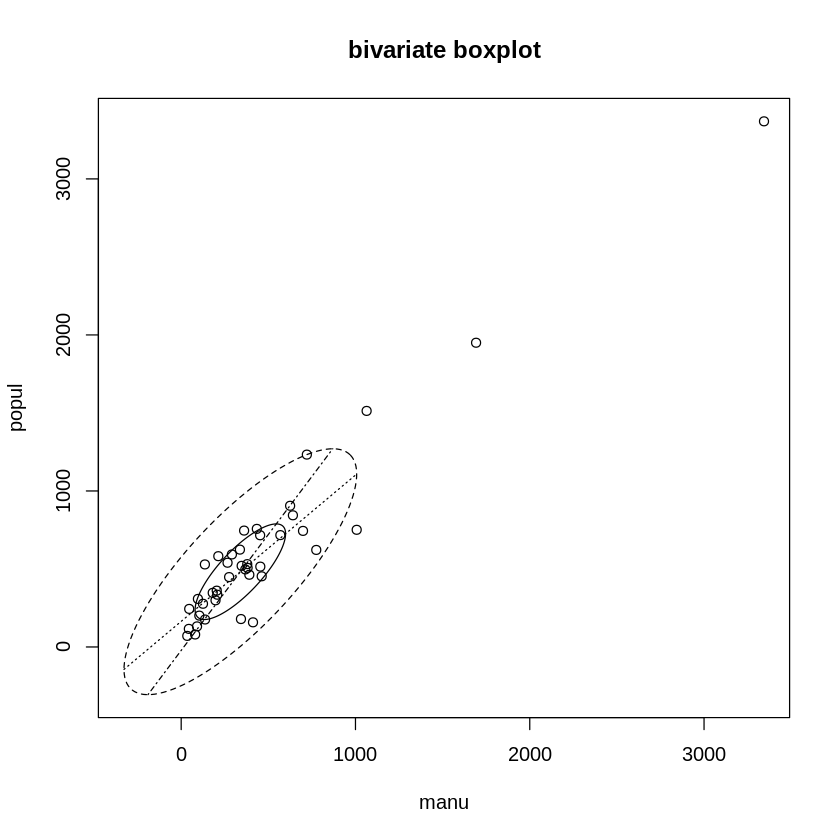

In [86]:
#bivariate boxplot
x = USairpollution[, c(3,4)] #manu, popul
bvbox(x, xlab="manu", ylab="popul")
title("bivariate boxplot")
identify(x) #특이값을 알려줌, 그래프 클릭시 케이스 번호 나옴

In [82]:
#확인한 특이값의 케이스 번호확인
rownames(x)[c(7, 9, 14, 30)]

[1] "Chicago"      "Cleveland"    "Detroit"      "Philadelphia"

##bubble plot

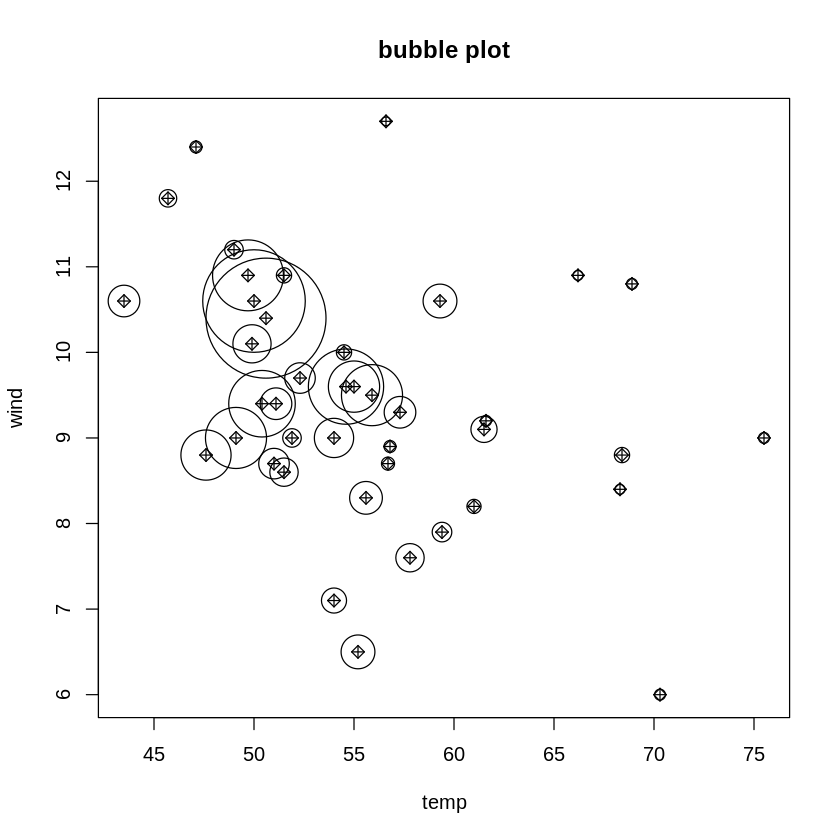

In [87]:
#산점도에 제3의 변수 SO2의 크기를 원으로 표현
plot(wind ~ temp, data = USairpollution, pch=9)
with(USairpollution, symbols(temp, wind, circles=SO2, inches=0.5, add=T))
title("bubble plot")

#다차원그래프

산점도행렬, 얼굴그림, 별그림

##산점도행렬

In [94]:
#데이터
url_social = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8B%A4%EB%B3%80%EB%9E%91%EB%B6%84%EC%84%9D/mvadata/social_data.txt"
social.data = read.table(url_social, header=T)

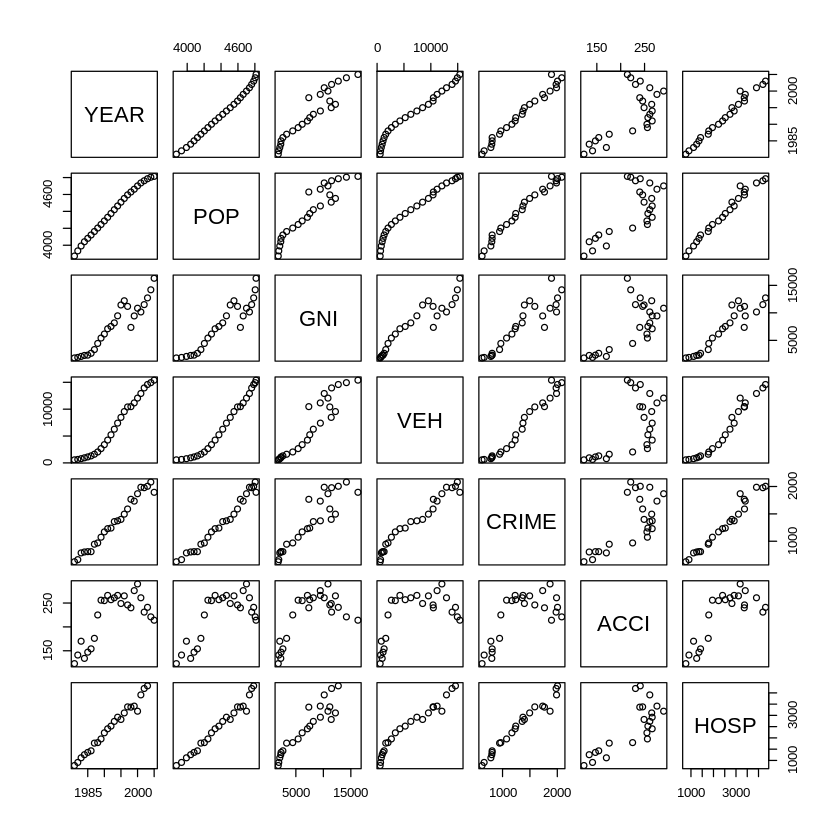

In [96]:
#산점도행렬
pairs(social.data)

##상관계수행렬 & 공분산행렬

In [104]:
#상관계수행렬 + 소수점 3자리 
round(cor(social.data), 3)
#공분산행렬 
round(cov(social.data), 3)

,YEAR,POP,GNI,VEH,CRIME,ACCI,HOSP
YEAR,1.000,0.996,0.948,0.985,0.989,0.680,NA
POP,0.996,1.000,0.941,0.977,0.989,0.721,NA
GNI,0.948,0.941,1.000,0.940,0.911,0.676,NA
VEH,0.985,0.977,0.940,1.000,0.982,0.599,NA
CRIME,0.989,0.989,0.911,0.982,1.000,0.683,NA
ACCI,0.680,0.721,0.676,0.599,0.683,1.000,NA
HOSP,NA,NA,NA,NA,NA,NA,1


,YEAR,POP,GNI,VEH,CRIME,ACCI,HOSP
YEAR,54.167,2183.292,30086.83,38305.75,3440.083,252.458,NA
POP,2183.292,88634.290,1208782.97,1536515.18,139116.072,10822.058,NA
GNI,30086.833,1208782.968,18602648.86,21426195.16,1856570.778,147089.317,NA
VEH,38305.750,1536515.182,21426195.16,27922895.49,2452766.230,159783.100,NA
CRIME,3440.083,139116.072,1856570.78,2452766.23,223404.377,16281.117,NA
ACCI,252.458,10822.058,147089.32,159783.10,16281.117,2545.167,NA
HOSP,NA,NA,NA,NA,NA,NA,NA


##별그림

In [98]:
#별그림 그리기 전 데이터 가공
social = social.data[, -1] #결측치가 많은 HOSP제외
year = social.data[, 1]
rownames(social) = year
head(social)

,POP,GNI,VEH,CRIME,ACCI,HOSP
,<int>,<int>,<int>,<int>,<int>,<int>
1981,3872,1800,572,626,123,773
1982,3933,1893,647,664,141,911
1983,3991,2076,785,787,170,1116
1984,4041,2257,948,804,134,1254
1985,4081,2309,1113,810,147,1355
1986,4121,2643,1309,810,154,1426


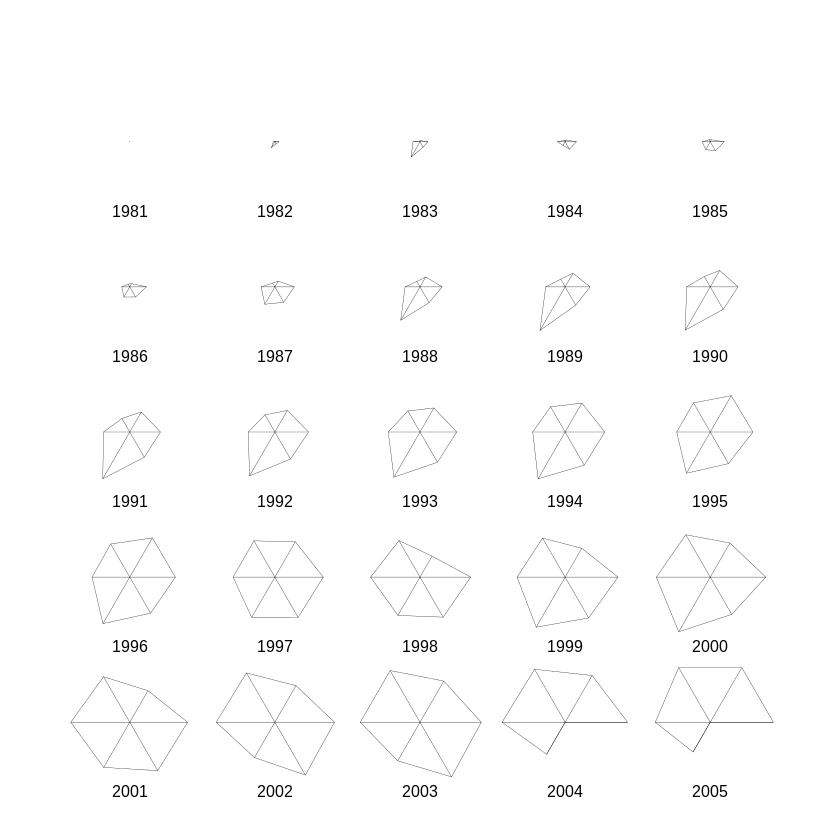

In [99]:
#별그림
stars(social)

## 얼굴그림

In [101]:
#체르노프그림 패키지
install.packages("aplpack")
library(aplpack)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“no DISPLAY variable so Tk is not available”


[1] "Warning: NA elements have been exchanged by mean values!!"
effect of variables:
 modified item       Var    
 "height of face   " "POP"  
 "width of face    " "GNI"  
 "structure of face" "VEH"  
 "height of mouth  " "CRIME"
 "width of mouth   " "ACCI" 
 "smiling          " "HOSP" 
 "height of eyes   " "POP"  
 "width of eyes    " "GNI"  
 "height of hair   " "VEH"  
 "width of hair   "  "CRIME"
 "style of hair   "  "ACCI" 
 "height of nose  "  "HOSP" 
 "width of nose   "  "POP"  
 "width of ear    "  "GNI"  
 "height of ear   "  "VEH"  


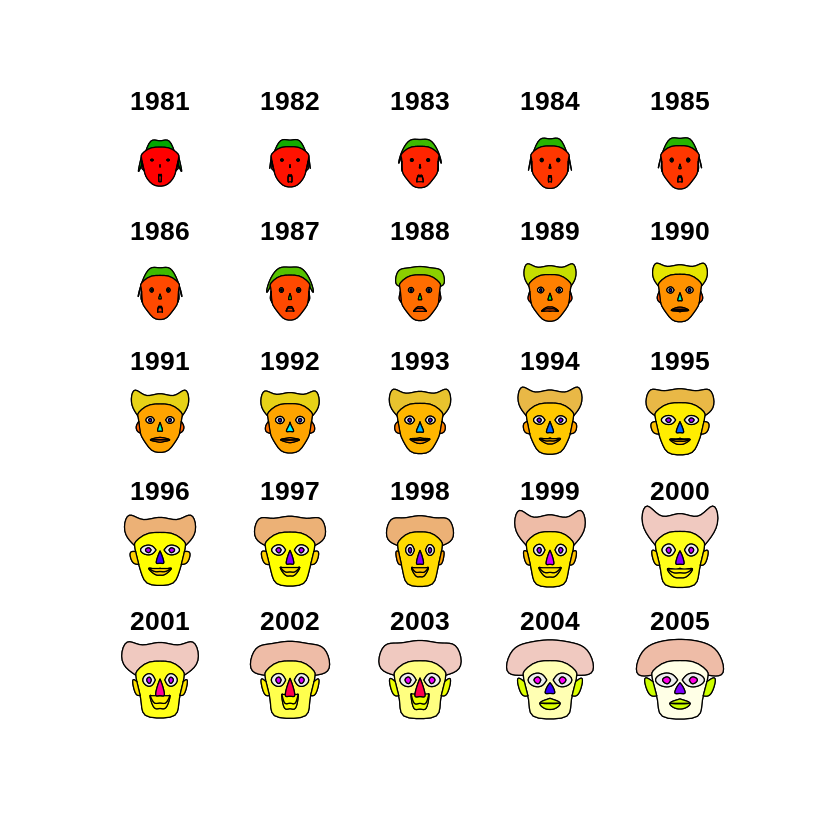

In [110]:
#얼굴그림
faces(social, face.type=1)

#연습문제 - 생략